In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False



import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'

# Set default figure size
plt.rcParams['figure.figsize'] = (6, 4)  # width, height in inches

# Set default font sizes
plt.rcParams['font.size'] = 15  # Default font size
plt.rcParams['axes.titlesize'] = 15  # Title font size
plt.rcParams['axes.labelsize'] = 15  # Label font size
plt.rcParams['xtick.labelsize'] = 15  # x-axis tick label font size
plt.rcParams['ytick.labelsize'] = 15  # y-axis tick label font size
plt.rcParams['legend.fontsize'] = 15  # Legend font size
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [3]:

figdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/ratemapex'
misc.get_or_create_subdir(figdir)
data_dir = '/mnt/home/szheng/ceph/place_variability/data/paper'


In [3]:
# figdir = '/mnt/home/szheng/ceph/place_variability/fig/sfn23_poster'
# misc.get_or_create_subdir(figdir)

/mnt/home/szheng/ceph/place_variability/fig/sfn23_poster made!


'/mnt/home/szheng/ceph/place_variability/fig/sfn23_poster'

In [4]:
import database
db = database.db

subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')
to_exclude_sess = ['e16_3m2_211211']
subdb=subdb.loc[~subdb['sess_name'].isin(to_exclude_sess)]


import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
import get_all_switch_add_metrics as gasam

import preprocess_one_session as prepos

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [5]:
fn = 'prepped_data_agg.p'
fn_full = os.path.join(data_dir,fn)
prepped_data_agg = pickle.load(open(fn_full,'rb'))

all_fields_recombined_all = prepped_data_agg['all_fields_recombined_all']
pf_params_recombined_all=  prepped_data_agg['pf_params_recombined_all']
fr_map_trial_df_all= prepped_data_agg['fr_map_trial_df_all']
occu_map_all = prepped_data_agg['occu_map_all']
fr_map_all = prepped_data_agg['fr_map_all']

pval_all = prepped_data_agg['pval_all']
X_pwc_all = prepped_data_agg['X_pwc_all']
X_raw_all = prepped_data_agg['X_raw_all']
changes_df_all = prepped_data_agg['changes_df_all']
var_res_all_test = prepped_data_agg['var_res_all']
# corr_all = prepped_data_agg['corr_all']
all_sw_d_all = prepped_data_agg['all_sw_d_all']
all_sw_with_metrics_d_all = prepped_data_agg['all_sw_with_metrics_d_all']
best_n_all_test = prepped_data_agg['best_n_all']
spk_beh_df_all = prepped_data_agg['spk_beh_df_all']

best_n_all=prepped_data_agg['best_n_all']

ntrials_per_tt=fr_map_trial_df_all.groupby(level=(0,1,2,3)).apply(lambda x:x.dropna(axis=1,how='all').shape[1])
ntrials_mask = ntrials_per_tt.groupby(level=(0,1,2)).apply(lambda x:(x>=7).all()) 



In [6]:
var_res_all_test['fit_var_ratio_1cp'] = pval_all[1]['exp_var_ratio']
var_res_all_test['fit_var_ratio_div_sh_1cp'] = pval_all[1]['exp_var_ratio'] / pval_all[1]['exp_var_ratio_sh_med']


In [8]:
best_n_all_ = best_n_all_test
import glob
cell_metrics_df_all = {}
for ind,row in subdb.iterrows():
    data_dir_full = row['data_dir_full']
    ani = ind[0]
    sess = row['sess_name']
    
    cell_metrics=glob.glob(os.path.join(data_dir_full,'*cell_metrics.cellinfo.mat'))[0]
    cell_metrics = dpn.loadmat_full(cell_metrics,'cell_metrics')
    
    metrics=['UID','putativeCellType','firingRate','firingRateCV','firingRate_NREMstate','firingRate_REMstate','firingRate_WAKEstate','burstIndex_Mizuseki2012']
    cell_metrics_df = pd.DataFrame({k:cell_metrics[k] for k in metrics})
    cell_metrics_df_all[ani,sess] = cell_metrics_df
cell_metrics_df_all = pd.concat(cell_metrics_df_all,axis=0)

cell_metrics_df_all['UID'] = cell_metrics_df_all['UID'].astype(int)
cell_metrics_df_all = cell_metrics_df_all.reset_index(level=2,drop=True).set_index('UID',append=True)

# field with any switch vs no switch, metrics
task_index=0
cell_with_any_sw_one_task = best_n_all_.loc[(slice(None),slice(None),task_index)].groupby(level=(0,1,3)).apply(lambda x:(x>0).any())
cell_metrics_df_all['has_switch']  = cell_with_any_sw_one_task

ma=cell_metrics_df_all['has_switch'].notna()
cell_metrics_df_all_pc = cell_metrics_df_all.loc[ma]

In [7]:
import variability_axis as va
reload(va)

<module 'variability_axis' from '/mnt/home/szheng/projects/place_variability/code/variability_axis.py'>

In [8]:
savefn_full = os.path.join(data_dir,'per_field_metrics_shtest_with_1cp.p')
# pickle.dump(per_field_metrics_all,open(savefn_full,'wb'))
per_field_metrics_all=pickle.load(open(savefn_full,'rb'))

# plot

In [9]:


import plot_all_fr_map_x_pwc_one_session as plotfm
reload(plotfm)

<module 'plot_all_fr_map_x_pwc_one_session' from '/mnt/home/szheng/projects/place_variability/code/plot_all_fr_map_x_pwc_one_session.py'>

In [10]:
ani = 'e15_13f1'#'e13_26m1'#
sess = 'e15_13f1_220117'#'e13_26m1_210913'#

data_dir_full = subdb.loc[subdb['sess_name']==sess]['data_dir_full'][0]

fr_map_trial_df = fr_map_trial_df_all.loc[ani,sess]
all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
all_sw_d = all_sw_d_all.loc[ani,sess]
all_sw_with_metrics_d = all_sw_with_metrics_d_all.loc[ani,sess]
spk_beh_df=spk_beh_df_all.loc[ani,sess]
trial_index_to_index_within_df = dpp.trial_index_to_index_within_trialtype(spk_beh_df)
X_raw = X_raw_all.loc[ani,sess]
X_pwc = X_pwc_all.loc[ani,sess]
changes_df = changes_df_all.loc[ani,sess]
pf_params_recombined = pf_params_recombined_all.loc[ani,sess]

/tmp/ipykernel_1163451/1570204553.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  fr_map_trial_df = fr_map_trial_df_all.loc[ani,sess]
/tmp/ipykernel_1163451/1570204553.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
/tmp/ipykernel_1163451/1570204553.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_d = all_sw_d_all.loc[ani,sess]
/tmp/ipykernel_1163451/1570204553.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_with_metrics_d = all_sw_with_metrics_d_all.loc[ani,sess]
/tmp/ipykernel_1163451/1570204553.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  spk_beh_df=spk_beh_df_all.loc[ani,sess]
/tmp/ipykernel_1163451/1570204553.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_raw = X_raw_all.loc[ani,sess]
/tmp/ipykernel_1163451/1

In [10]:
task_ind=task = 0
per_field_metrics_all_one = per_field_metrics_all.loc[ani,sess,task_ind]

uid_more_field = all_fields_recombined.loc[task_ind].groupby(level=1).count().iloc[:,0]>2
uid_more_field=uid_more_field.loc[uid_more_field].index

all_sw_with_metrics_one= all_sw_with_metrics_d_all.loc[ani,sess,task_ind]

si_thresh_ind=per_field_metrics_all_one.query('si>0.5').index
# si_thresh_ind=per_field_metrics_all_one.query('si>1.&fit_var_ratio==0').index

switch_metric_thresh_ind=all_sw_with_metrics_one.query('switch==1&pre_mean_fr_all_norm<0.3&post_mean_fr_3_norm>0.5&switch_trial>6')[['trialtype','uid','field_index']]
# switch_metric_thresh_ind=all_sw_with_metrics_one.query('switch==-1&pre_mean_fr_all_norm>0.5&post_mean_fr_all_norm<0.3&switch_trial>5')[['trialtype','uid','field_index']]
switch_metric_thresh_ind=pd.MultiIndex.from_frame(switch_metric_thresh_ind)



/tmp/ipykernel_35926/1256748050.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  per_field_metrics_all_one = per_field_metrics_all.loc[ani,sess,task_ind]


In [27]:
# ind=si_thresh_ind.intersection(switch_metric_thresh_ind)
ind=si_thresh_ind
# ind=switch_metric_thresh_ind
# ma=ind.get_level_values(1).isin(uid_more_field)
# ind = ind[ma]
print(ind)

ii=0
tt,uid,field_id=ind[ii]

MultiIndex([(   0.0,  32, 1),
            (   0.0,  35, 1),
            (   0.0,  37, 0),
            (   0.0,  37, 1),
            (   0.0,  37, 2),
            (   0.0,  38, 1),
            (   0.0,  40, 0),
            (   0.0,  40, 1),
            (   0.0,  41, 0),
            (   0.0,  41, 1),
            ...
            ('both', 310, 0),
            ('both', 313, 0),
            ('both', 329, 0),
            ('both', 331, 0),
            ('both', 349, 0),
            ('both', 361, 0),
            ('both', 363, 0),
            ('both', 368, 0),
            ('both', 374, 0),
            ('both', 376, 0)],
           length=475)


In [29]:
all_sw_with_metrics_one.query('uid==@uid')[['pre_mean_fr_3_norm','post_mean_fr_3_norm']]

,pre_mean_fr_3_norm,post_mean_fr_3_norm
5,0.065449,0.751476
147,0.242154,0.788593


In [30]:
all_sw_d.loc[task_ind].query('uid==@uid')

,trialtype,uid,field_index,time,speed_gauss,field_pos,trial_index,switch,index_within,switch_trial,switch_trial_frac,pre_ntrials_in_segment,post_ntrials_in_segment
5,both,32,0,6721.911700,21.360615,30.0,3,1.0,1,3.0,0.09375,3,29
147,0.0,32,1,7695.075233,15.125615,45.0,21,1.0,11,11.0,0.55000,11,9


/mnt/home/szheng/projects/util_code/plot_helper.py:558: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Set tick labels


Text(0.5, 1.0, 'task 0, trialtype 0, uid 32')

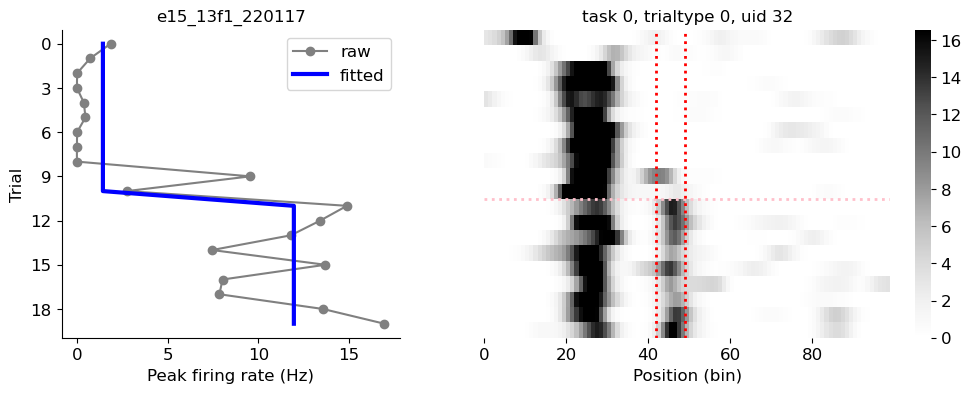

In [89]:
# all_fields_row_one = all_fields_recombined.loc[0,0,141,1]
# all_fields_row_one = all_fields_recombined.loc[0,1,480,0]
reload(plotfm)

# all_fields_row_one = all_fields_recombined.iloc[800]

# tt,uid,field_id=0,3,0
task_ind,tt,uid,field_id= 0,0,32,1
all_fields_row_one=all_fields_recombined.loc[task_ind,tt,uid,field_id]
task_ind,tt,uid,field_id=all_fields_row_one.name
fig,axs=plotfm.plot_ratemap_fr_one_field(all_fields_row_one,fr_map_trial_df,X_raw,X_pwc,all_sw_d,trial_index_to_index_within_df,
                            save_fig_fn = None,
                            close_fig = False,
                                         vmax_relative_to_field=True,)
axs[0].set_title(sess)
if isinstance(tt,float):
    tt=int(tt)
axs[1].set_title(f'task {task_ind}, trialtype {tt}, uid {uid}')

# for fmt in ['svg','png']:
#     fig.savefig(os.path.join(figdir,f'good_on_example_0.{fmt}'))


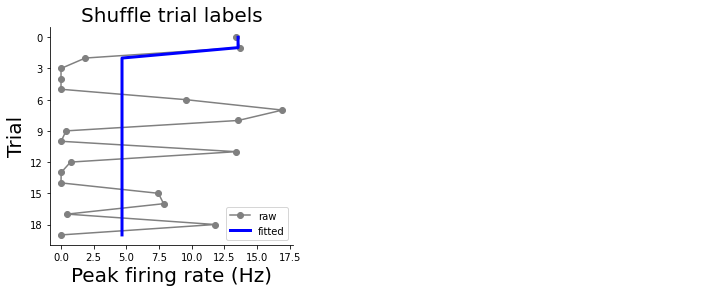

In [13]:
reload(plotfm)
sw_ind_within,tt_ratemap=plotfm.get_sw_ind_within_and_tt_ratemap(all_sw_d,0,tt,uid,field_id)

# shuffle test schematic
import change_point_analysis as cpa
columns_one_tt = X_pwc.loc[task,tt_ratemap].dropna(axis=1,how='all').columns
X_raw_one = X_raw.loc[task,tt,uid,field_id][columns_one_tt]
# X_pwc_one = X_pwc.loc[task,tt,uid,field_id][columns_one_tt]
X_raw_one_sh = X_raw_one.sample(len(X_raw_one),random_state=0,replace=True).values
X_pwc_one_sh,_=cpa.predict_from_cpts_wrapper(X_raw_one_sh,1,cost='l2',min_size=2)

fig,axs=plt.subplots(1,2,figsize=(6*2,4),gridspec_kw={'width_ratios': [1,1.5]})
ax = axs[0]
ax.set_title('Shuffle trial labels')
fig,ax=plotfm.plot_x_raw_and_pwc(X_raw_one_sh,X_pwc_one_sh,fig=fig,ax=ax,pwc_c='b')
axs[1].set_axis_off()

for fmt in ['svg','png']:
    fig.savefig(os.path.join(figdir,f'trial_shuffle_x.{fmt}'))

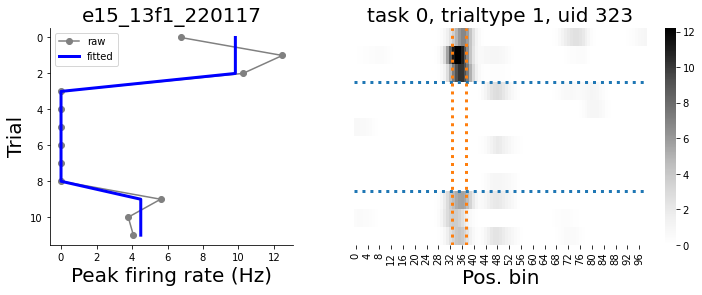

In [14]:
task_ind,tt,uid,field_id= 0,1,323,0
all_fields_row_one=all_fields_recombined.loc[task_ind,tt,uid,field_id]
task_ind,tt,uid,field_id=all_fields_row_one.name
fig,axs=plotfm.plot_ratemap_fr_one_field(all_fields_row_one,fr_map_trial_df,X_raw,X_pwc,all_sw_d,trial_index_to_index_within_df,
                            save_fig_fn = None,
                            close_fig = False,
                                         vmax_relative_to_field=True,
                                )
axs[0].set_title(sess)
if isinstance(tt,float):
    tt=int(tt)
axs[1].set_title(f'task {task_ind}, trialtype {tt}, uid {uid}')

for fmt in ['svg','png']:
    fig.savefig(os.path.join(figdir,f'good_off_example_0.{fmt}'))


(<Figure size 432x288 with 2 Axes>, <Axes: xlabel='Position'>)

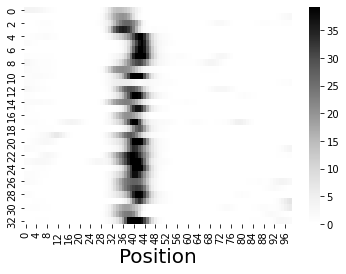

In [448]:
if tt=='both':
    tt_rm=0
else:
    tt_rm=tt
frmap=fr_map_trial_df.loc[task_ind,tt_rm,uid].dropna(axis=1,how='all').T
ph.heatmap(frmap)

# simpler exmaples

In [144]:
ani = 'e15_13f1'#'e13_26m1'#
sess = 'e15_13f1_220117'#'e13_26m1_210913'#

data_dir_full = subdb.loc[subdb['sess_name']==sess]['data_dir_full'][0]

fr_map_trial_df = fr_map_trial_df_all.loc[ani,sess]
all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
all_sw_d = all_sw_d_all.loc[ani,sess]
all_sw_with_metrics_d = all_sw_with_metrics_d_all.loc[ani,sess]
spk_beh_df=spk_beh_df_all.loc[ani,sess]
trial_index_to_index_within_df = dpp.trial_index_to_index_within_trialtype(spk_beh_df)
X_raw = X_raw_all.loc[ani,sess]
X_pwc = X_pwc_all.loc[ani,sess]
changes_df = changes_df_all.loc[ani,sess]
pf_params_recombined = pf_params_recombined_all.loc[ani,sess]

/tmp/ipykernel_1163451/1570204553.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  fr_map_trial_df = fr_map_trial_df_all.loc[ani,sess]
/tmp/ipykernel_1163451/1570204553.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
/tmp/ipykernel_1163451/1570204553.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_d = all_sw_d_all.loc[ani,sess]
/tmp/ipykernel_1163451/1570204553.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_with_metrics_d = all_sw_with_metrics_d_all.loc[ani,sess]
/tmp/ipykernel_1163451/1570204553.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  spk_beh_df=spk_beh_df_all.loc[ani,sess]
/tmp/ipykernel_1163451/1570204553.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_raw = X_raw_all.loc[ani,sess]
/tmp/ipykernel_1163451/1

In [98]:
task_ind=task = 0
per_field_metrics_all_one = per_field_metrics_all.loc[ani,sess,task_ind]

uid_more_field = all_fields_recombined.loc[task_ind].groupby(level=1).count().iloc[:,0]<=1
uid_more_field=uid_more_field.loc[uid_more_field].index

all_sw_with_metrics_one= all_sw_with_metrics_d_all.loc[ani,sess,task_ind]

si_thresh_ind=per_field_metrics_all_one.query('si>0.5').index
# si_thresh_ind=per_field_metrics_all_one.query('si>1.&fit_var_ratio==0').index

switch_metric_thresh_ind=all_sw_with_metrics_one.query('switch==1&pre_mean_fr_all_norm<0.3&post_mean_fr_3_norm>0.5&switch_trial>6')[['trialtype','uid','field_index']]
# switch_metric_thresh_ind=all_sw_with_metrics_one.query('switch==-1&pre_mean_fr_all_norm>0.5&post_mean_fr_all_norm<0.3&switch_trial>5')[['trialtype','uid','field_index']]
switch_metric_thresh_ind=pd.MultiIndex.from_frame(switch_metric_thresh_ind)

ind=si_thresh_ind.intersection(switch_metric_thresh_ind)
# ind=si_thresh_ind
# ind=switch_metric_thresh_ind
ma=ind.get_level_values(1).isin(uid_more_field)
ind = ind[ma]
print(ind)

ii=0
tt,uid,field_id=ind[ii]

MultiIndex([(   0.0,  71, 0),
            (   0.0, 123, 0),
            (   0.0, 241, 0),
            (   0.0, 312, 0),
            (   0.0, 358, 0),
            (   1.0, 245, 0),
            ('both', 131, 0),
            ('both', 164, 0),
            ('both', 240, 0)],
           )


/tmp/ipykernel_1163451/858148734.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  per_field_metrics_all_one = per_field_metrics_all.loc[ani,sess,task_ind]
/tmp/ipykernel_1163451/858148734.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_with_metrics_one= all_sw_with_metrics_d_all.loc[ani,sess,task_ind]


/mnt/home/szheng/projects/util_code/plot_helper.py:558: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Set tick labels


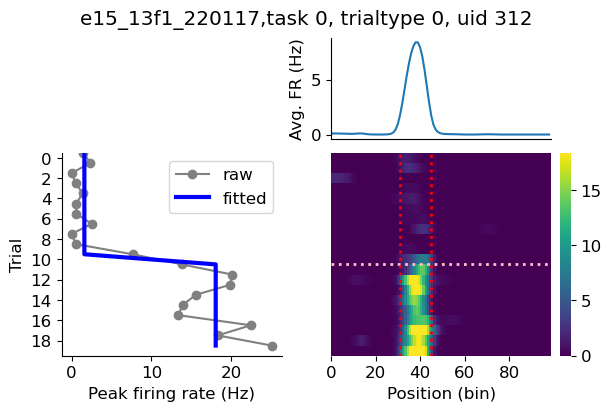

In [145]:
reload(plotfm)
reload(ph)
task_ind,tt,uid,field_id= 0,0,312,0
all_fields_row_one=all_fields_recombined.loc[task_ind,tt,uid,field_id]
fig,axs=plotfm.plot_ratemap_fr_one_field_avgfm(all_fields_row_one,fr_map_trial_df,X_raw,X_pwc,all_sw_d,
                            trial_index_to_index_within_df,
                            save_fig_fn = None,
                            close_fig = False,
                            vmax_clip_quantile=0.99,
                            vmax_relative_to_field=False,
                            fig=None,axs=None
                            )


if isinstance(tt,float):
    tt=int(tt)
fig.suptitle(f'{sess},task {task_ind}, trialtype {tt}, uid {uid}')

for fmt in ['svg','png']:
    fig.savefig(os.path.join(figdir,f'good_on_example_{sess}_{task_ind}_{tt}_{uid}.{fmt}'))


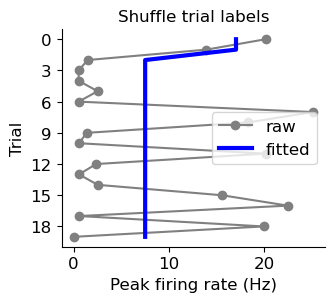

In [150]:
reload(plotfm)
sw_ind_within,tt_ratemap=plotfm.get_sw_ind_within_and_tt_ratemap(all_sw_d,0,tt,uid,field_id,trial_index_to_index_within_df)

# shuffle test schematic
import change_point_analysis as cpa
columns_one_tt = X_pwc.loc[task,tt_ratemap].dropna(axis=1,how='all').columns
X_raw_one = X_raw.loc[task,tt,uid,field_id][columns_one_tt]
# X_pwc_one = X_pwc.loc[task,tt,uid,field_id][columns_one_tt]
X_raw_one_sh = X_raw_one.sample(len(X_raw_one),random_state=0,replace=True).values
X_pwc_one_sh,_=cpa.predict_from_cpts_wrapper(X_raw_one_sh,1,cost='l2',min_size=2)

# fig,axs=plt.subplots(1,2,figsize=(6*2,4),gridspec_kw={'width_ratios': [1,1.5]})
from matplotlib import gridspec
fig=plt.figure(figsize=(6,4),constrained_layout=True)
gs = gridspec.GridSpec(2, 3, width_ratios=[1,1,0.05],height_ratios=[0.5,1],figure=fig)
ax = fig.add_subplot(gs[1,0])

# ax = axs[0]
ax.set_title('Shuffle trial labels')
fig,ax=plotfm.plot_x_raw_and_pwc(X_raw_one_sh,X_pwc_one_sh,fig=fig,ax=ax,pwc_c='b')
axs[1].set_axis_off()

for fmt in ['svg','png']:
    fig.savefig(os.path.join(figdir,f'trial_shuffle_x.{fmt}'))

# ex off

In [125]:
ani = 'e13_26m1'#'e15_13f1'#
sess = 'e13_26m1_210913'#'e15_13f1_220117'#

data_dir_full = subdb.loc[subdb['sess_name']==sess]['data_dir_full'][0]

fr_map_trial_df = fr_map_trial_df_all.loc[ani,sess]
all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
all_sw_d = all_sw_d_all.loc[ani,sess]
all_sw_with_metrics_d = all_sw_with_metrics_d_all.loc[ani,sess]
spk_beh_df=spk_beh_df_all.loc[ani,sess]
trial_index_to_index_within_df = dpp.trial_index_to_index_within_trialtype(spk_beh_df)
X_raw = X_raw_all.loc[ani,sess]
X_pwc = X_pwc_all.loc[ani,sess]
changes_df = changes_df_all.loc[ani,sess]
pf_params_recombined = pf_params_recombined_all.loc[ani,sess]

/tmp/ipykernel_1163451/1419936095.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  fr_map_trial_df = fr_map_trial_df_all.loc[ani,sess]
/tmp/ipykernel_1163451/1419936095.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
/tmp/ipykernel_1163451/1419936095.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_d = all_sw_d_all.loc[ani,sess]
/tmp/ipykernel_1163451/1419936095.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_with_metrics_d = all_sw_with_metrics_d_all.loc[ani,sess]
/tmp/ipykernel_1163451/1419936095.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  spk_beh_df=spk_beh_df_all.loc[ani,sess]
/tmp/ipykernel_1163451/1419936095.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_raw = X_raw_all.loc[ani,sess]
/tmp/ipykernel_1163451/1

In [126]:
task_ind=task = 0
per_field_metrics_all_one = per_field_metrics_all.loc[ani,sess,task_ind]

uid_more_field = all_fields_recombined.loc[task_ind].groupby(level=1).count().iloc[:,0]<=1
uid_more_field=uid_more_field.loc[uid_more_field].index

all_sw_with_metrics_one= all_sw_with_metrics_d_all.loc[ani,sess,task_ind]

si_thresh_ind=per_field_metrics_all_one.query('si>0.5').index

/tmp/ipykernel_1163451/3001399122.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  per_field_metrics_all_one = per_field_metrics_all.loc[ani,sess,task_ind]
/tmp/ipykernel_1163451/3001399122.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_with_metrics_one= all_sw_with_metrics_d_all.loc[ani,sess,task_ind]


In [127]:
# switch_metric_thresh_ind=all_sw_with_metrics_one.query('switch==-1&pre_mean_fr_all_norm>0.5&post_mean_fr_all_norm<0.3')[['trialtype','uid','field_index']]
# switch_metric_thresh_ind=all_sw_with_metrics_one.query('switch==-1&pre_mean_fr_all_norm>0.5&post_mean_fr_all_norm<0.4')[['trialtype','uid','field_index']]
switch_metric_thresh_ind=all_sw_with_metrics_one.query('switch==-1')[['trialtype','uid','field_index']]
switch_metric_thresh_ind=pd.MultiIndex.from_frame(switch_metric_thresh_ind)

ind=si_thresh_ind.intersection(switch_metric_thresh_ind)
# ind=si_thresh_ind
# ind=switch_metric_thresh_ind
ma=ind.get_level_values(1).isin(uid_more_field)
ind = ind[ma]
print(ind)

ii=0
tt,uid,field_id=ind[ii]

MultiIndex([(0.0, 158, 1),
            (0.0, 163, 0),
            (0.0, 225, 0),
            (0.0, 292, 0),
            (0.0, 300, 0),
            (0.0, 325, 0),
            (0.0, 375, 0),
            (0.0, 392, 0),
            (0.0, 414, 0),
            (0.0, 427, 0),
            (0.0, 437, 0),
            (0.0, 442, 0),
            (1.0, 159, 0),
            (1.0, 236, 0),
            (1.0, 243, 0),
            (1.0, 276, 1),
            (1.0, 383, 0),
            (1.0, 409, 0),
            (1.0, 446, 0)],
           )


/mnt/home/szheng/projects/util_code/plot_helper.py:558: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Set tick labels


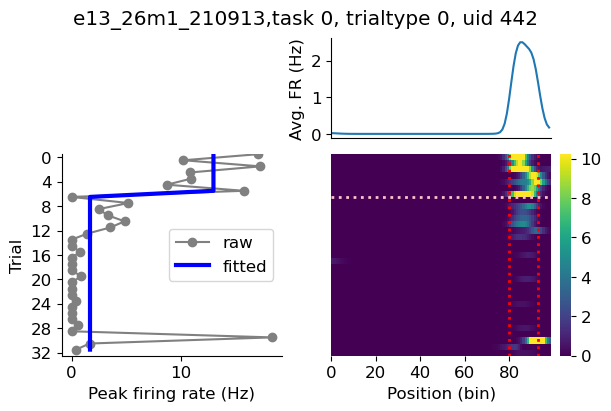

In [143]:
reload(plotfm)
reload(ph)
task_ind,tt,uid,field_id= 0,0,442,0
all_fields_row_one=all_fields_recombined.loc[task_ind,tt,uid,field_id]
fig,axs=plotfm.plot_ratemap_fr_one_field_avgfm(all_fields_row_one,fr_map_trial_df,X_raw,X_pwc,all_sw_d,
                            trial_index_to_index_within_df,
                            save_fig_fn = None,
                            close_fig = False,
                            vmax_clip_quantile=0.99,
                            vmax_relative_to_field=False,
                            fig=None,axs=None
                            )


if isinstance(tt,float):
    tt=int(tt)
fig.suptitle(f'{sess},task {task_ind}, trialtype {tt}, uid {uid}')

for fmt in ['svg','png']:
    fig.savefig(os.path.join(figdir,f'good_off_example_{sess}_{task_ind}_{tt}_{uid}.{fmt}'))


# redo fig1

In [151]:
import figure_plot_helper as fph
reload(fph)

<module 'figure_plot_helper' from '/mnt/home/szheng/projects/place_variability/code/figure_plot_helper.py'>

In [154]:
best_n_all

e13_26m1  e13_26m1_210913  0  0.0   3   0    1
                                    27  0    0
                                    29  0    3
                                        1    0
                                        2    0
                                            ..
e14_2m3   e14_2m3_201118   0  both  30  0    0
                                    32  0    0
                                    38  0    0
                                    47  0    0
                                    53  0    0
Length: 14438, dtype: int64

In [160]:
si_ma = per_field_metrics_all['si'] > 0.5
best_n_all.loc[si_ma]

e13_26m1  e13_26m1_210913  0  0.0   3   0    1
                                    29  0    3
                                        1    0
                                        2    0
                                    30  0    0
                                            ..
e14_2m3   e14_2m3_201118   0  both  22  0    1
                                    23  0    3
                                    27  0    3
                                    32  0    0
                                    38  0    0
Length: 7787, dtype: int64

In [164]:
(best_n_all.loc[si_ma].loc[(slice(None),slice(None),0)]>0).mean()

0.23095097460129946

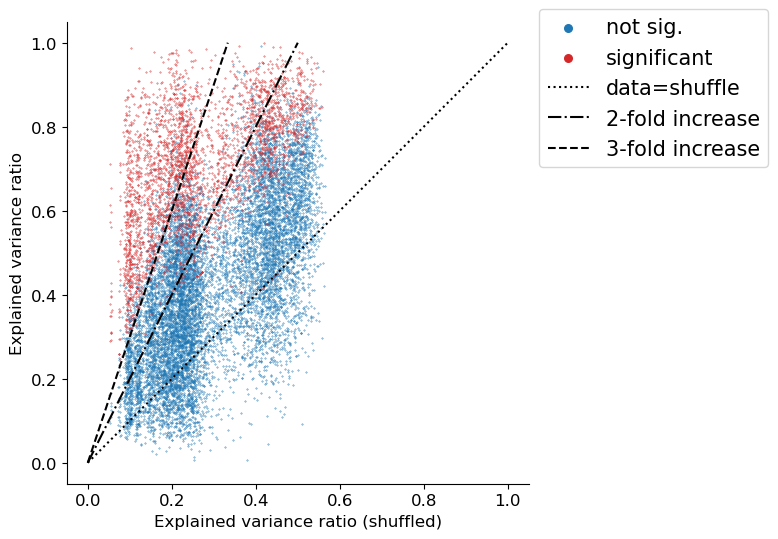

In [153]:
best_pval_all,fig,ax=fph.plot_exp_var_ratio_vs_shuffle(best_n_all,pval_all=pval_all,best_pval_all=None)

fn = os.path.join('/mnt/home/szheng/ceph/place_variability/fig/paper/figure1','exp_var_ratio_vs_shuffle.svg')
fig.savefig(fn,bbox_inches='tight')
fn = os.path.join('/mnt/home/szheng/ceph/place_variability/fig/paper/figure1','exp_var_ratio_vs_shuffle.png')
fig.savefig(fn,bbox_inches='tight')